<a href="https://colab.research.google.com/github/Rizwanhu/Weather-Data-Analysis-Project/blob/main/ML_Weather_Pattren_data_analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime


cities = pd.read_csv('pakistan_cities.csv')
cities.tail()

,City,Province,Country
142,Nasirabad,Balochistan,Pakistan
143,Tump,Balochistan,Pakistan
144,Kahan,Balochistan,Pakistan
145,Shahdadkot,Balochistan,Pakistan
146,Ormara,Balochistan,Pakistan


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime

api_key = "b2223cfc3c634eb89cd438e854445d89"

weather_data = []

for index, row in cities.iterrows():
    city = row['City']
    country = row['Country']
    province = row['Province']
    # Include the country in the query
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city},{country}&appid={api_key}&units=metric'

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        temp = data['main']['temp']
        feels_like = data['main']['feels_like']
        temp_min = data['main']['temp_min']
        temp_max = data['main']['temp_max']
        humidity = data['main']['humidity']
        pressure = data['main']['pressure']
        wind_speed = data['wind']['speed']
        desc = data['weather'][0]['description']
        #country = data['sys']['country']
        clouds = data['clouds']['all']
        lon = data['coord']['lon']
        lat = data['coord']['lat']
        sunrise_unix = data['sys']['sunrise']
        sunset_unix = data['sys']['sunset']

        sunrise = datetime.fromtimestamp(sunrise_unix).strftime('%I:%M %p')
        sunset = datetime.fromtimestamp(sunset_unix).strftime('%I:%M %p')

        weather_data.append({
            'Country': country,
            'Province':province,
            'City': city,
            'Temperature': temp,
            'Feels_Like': feels_like,
            'Min_Temp': temp_min,
            'Max_Temp': temp_max,
            'Humidity': humidity,
            'Pressure': pressure,
            'Wind_Speed': wind_speed,
            'Cloudiness': clouds,
            'Description': desc.capitalize(),
            'Longitude': lon,
            'Latitude': lat,
            'Sunrise': sunrise,
            'Sunset': sunset
        })

    else:
        weather_data.append({
            'City': city,
            'Error': f'Error fetching data: {response.status_code}'
        })

weather_df = pd.DataFrame(weather_data)

In [5]:
weather_df.to_csv('pakistan_weather_data.csv', index=False)

print(weather_df)
weather_df.head()

      Country     Province        City  Temperature  Feels_Like  Min_Temp  \
0    Pakistan        Sindh     Karachi        31.90       33.08     31.90   
1    Pakistan        Sindh   Hyderabad        28.23       30.98     28.23   
2    Pakistan        Sindh      Sukkur        35.23       33.18     35.23   
3    Pakistan        Sindh     Larkana        35.40       32.97     35.40   
4         NaN          NaN  Mirpurkhas          NaN         NaN       NaN   
..        ...          ...         ...          ...         ...       ...   
142  Pakistan  Balochistan   Nasirabad        32.85       30.79     32.85   
143       NaN          NaN        Tump          NaN         NaN       NaN   
144  Pakistan  Balochistan       Kahan         9.48        6.76      9.48   
145  Pakistan  Balochistan  Shahdadkot        35.00       32.65     35.00   
146  Pakistan  Balochistan      Ormara        27.38       29.31     27.38   

     Max_Temp  Humidity  Pressure  Wind_Speed  Cloudiness      Description 

,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset,Error
0,Pakistan,Sindh,Karachi,31.90,33.08,31.90,31.90,45.0,1014.0,2.06,0.0,Haze,67.0822,24.9056,01:38 AM,12:52 PM,NaN
1,Pakistan,Sindh,Hyderabad,28.23,30.98,28.23,29.73,69.0,1012.0,2.57,40.0,Haze,78.4744,17.3753,12:44 AM,12:15 PM,NaN
2,Pakistan,Sindh,Sukkur,35.23,33.18,35.23,35.23,19.0,1013.0,1.15,0.0,Clear sky,68.8574,27.7052,01:34 AM,12:41 PM,NaN
3,Pakistan,Sindh,Larkana,35.40,32.97,35.40,35.40,15.0,1013.0,1.21,0.0,Clear sky,68.2141,27.5551,01:37 AM,12:44 PM,NaN
4,NaN,NaN,Mirpurkhas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error fetching data: 404


In [6]:
import pandas as pd
import plotly.graph_objects as go

cities_df = pd.read_csv('pakistan_cities.csv')

province_country_counts = cities_df.groupby(['Province', 'Country']).size().reset_index(name='City_Count')

source = province_country_counts['Province']
target = province_country_counts['Country']
values = province_country_counts['City_Count']

labels = list(set(source) | set(target))
label_to_index = {label: idx for idx, label in enumerate(labels)}
source_indices = [label_to_index[province] for province in source]
target_indices = [label_to_index[country] for country in target]

# Create the Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
)])

# Update layout and show figure
fig.update_layout(title_text="City Distribution across Provinces and Countries in Pakistan", font_size=10)
fig.show()


In [7]:
import pandas as pd

weather_df = pd.read_csv('pakistan_cities.csv')

print(weather_df.columns)


Index(['City', 'Province', 'Country'], dtype='object')


In [8]:
import pandas as pd
import plotly.graph_objects as go
import requests
from datetime import datetime

cities = pd.read_csv('pakistan_cities.csv')

api_key = "b2223cfc3c634eb89cd438e854445d89"

weather_data = []
for index, row in cities.iterrows():
    city = row['City']
    country = row['Country']
    province = row['Province']

    url = f'http://api.openweathermap.org/data/2.5/weather?q={city},{country}&appid={api_key}&units=metric'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        temp = data['main']['temp']
        feels_like = data['main']['feels_like']
        humidity = data['main']['humidity']
        pressure = data['main']['pressure']
        wind_speed = data['wind']['speed']
        desc = data['weather'][0]['description'].capitalize()

        weather_data.append({
            'Province': province,
            'City': city,
            'Temperature': temp,
            'Feels_Like': feels_like,
            'Humidity': humidity,
            'Pressure': pressure,
            'Wind_Speed': wind_speed,
            'Description': desc
        })
    else:
        print(f"Error fetching data for {city}: {response.status_code}")

weather_df = pd.DataFrame(weather_data)

sankey_figures = []

for province in weather_df['Province'].unique():
    province_data = weather_df[weather_df['Province'] == province]

    source = [province] * len(province_data)
    target = province_data['City'].tolist()
    values = [1] * len(province_data)

    labels = [province] + target
    label_to_index = {label: idx for idx, label in enumerate(labels)}

    source_indices = [label_to_index[province] for _ in source]
    target_indices = [label_to_index[city] for city in target]

    customdata = [
        [
            f"Temperature: {row['Temperature']}°C",
            f"Feels Like: {row['Feels_Like']}°C",
            f"Humidity: {row['Humidity']}%",
            f"Pressure: {row['Pressure']} hPa",
            f"Wind Speed: {row['Wind_Speed']} m/s",
            f"Description: {row['Description']}"
        ]
        for _, row in province_data.iterrows()
    ]

    hovertemplate = "<br>".join([
        "City: %{target.label}",
        "%{customdata[0]}",
        "%{customdata[1]}",
        "%{customdata[2]}",
        "%{customdata[3]}",
        "%{customdata[4]}",
        "%{customdata[5]}",
    ])

    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels,
            color="blue"  # Adjust color as desired
        ),
        link=dict(
            source=source_indices,
            target=target_indices,
            value=values,
            customdata=customdata,
            hovertemplate=hovertemplate
        )
    )])

    fig.update_layout(title_text=f"Weather Data for Cities in {province}", font_size=10)
    sankey_figures.append(fig)

# Display each Sankey diagram
for fig in sankey_figures:
    fig.show()


Error fetching data for Mirpurkhas: 404
Error fetching data for Tharparkar: 404
Error fetching data for Naushahro Feroze: 404
Error fetching data for Chachro: 404
Error fetching data for Mirpur Bathoro: 404
Error fetching data for Rahim Yar Khan: 404
Error fetching data for Jehlum: 404
Error fetching data for Swat: 404
Error fetching data for Batkhela: 404
Error fetching data for Buner: 404
Error fetching data for Shangla: 404
Error fetching data for Lower Dir: 404
Error fetching data for Kurram: 404
Error fetching data for Orakzai: 404
Error fetching data for North Waziristan: 404
Error fetching data for South Waziristan: 404
Error fetching data for Takht Bhai: 404
Error fetching data for Jamrud: 404
Error fetching data for Lasbela: 404
Error fetching data for Jaffarabad: 404
Error fetching data for Killa Abdullah: 404
Error fetching data for Killa Saifullah: 404
Error fetching data for Jhal Magsi: 404
Error fetching data for Ghanche: 404
Error fetching data for Musa Khel: 404
Error f

In [9]:
df = pd.read_csv('pakistan_weather_data.csv')
df.head(10)

,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset,Error
0,Pakistan,Sindh,Karachi,31.90,33.08,31.90,31.90,45.0,1014.0,2.06,0.0,Haze,67.0822,24.9056,01:38 AM,12:52 PM,NaN
1,Pakistan,Sindh,Hyderabad,28.23,30.98,28.23,29.73,69.0,1012.0,2.57,40.0,Haze,78.4744,17.3753,12:44 AM,12:15 PM,NaN
2,Pakistan,Sindh,Sukkur,35.23,33.18,35.23,35.23,19.0,1013.0,1.15,0.0,Clear sky,68.8574,27.7052,01:34 AM,12:41 PM,NaN
3,Pakistan,Sindh,Larkana,35.40,32.97,35.40,35.40,15.0,1013.0,1.21,0.0,Clear sky,68.2141,27.5551,01:37 AM,12:44 PM,NaN
4,NaN,NaN,Mirpurkhas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error fetching data: 404
5,Pakistan,Sindh,Nawabshah,35.23,33.43,35.23,35.23,21.0,1013.0,2.27,0.0,Clear sky,68.4096,26.2483,01:34 AM,12:45 PM,NaN
6,Pakistan,Sindh,Jacobabad,35.17,33.01,35.17,35.17,18.0,1013.0,1.38,0.0,Clear sky,68.4388,28.2810,01:37 AM,12:42 PM,NaN
7,Pakistan,Sindh,Dadu,34.50,32.22,34.50,34.50,17.0,1013.0,0.65,0.0,Clear sky,67.7763,26.7329,01:37 AM,12:47 PM,NaN
8,Pakistan,Sindh,Thatta,33.36,32.16,33.36,33.36,28.0,1014.0,2.62,0.0,Clear sky,67.9235,24.7475,01:34 AM,12:48 PM,NaN
9,Pakistan,Sindh,Badin,33.24,32.02,33.24,33.24,28.0,1014.0,2.08,0.0,Clear sky,68.8384,24.6560,01:31 AM,12:45 PM,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      121 non-null    object 
 1   Province     121 non-null    object 
 2   City         147 non-null    object 
 3   Temperature  121 non-null    float64
 4   Feels_Like   121 non-null    float64
 5   Min_Temp     121 non-null    float64
 6   Max_Temp     121 non-null    float64
 7   Humidity     121 non-null    float64
 8   Pressure     121 non-null    float64
 9   Wind_Speed   121 non-null    float64
 10  Cloudiness   121 non-null    float64
 11  Description  121 non-null    object 
 12  Longitude    121 non-null    float64
 13  Latitude     121 non-null    float64
 14  Sunrise      121 non-null    object 
 15  Sunset       121 non-null    object 
 16  Error        26 non-null     object 
dtypes: float64(10), object(7)
memory usage: 19.6+ KB


In [11]:
df.describe()

,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Longitude,Latitude
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,29.477190,28.078347,29.476446,29.495620,26.322314,1014.619835,2.232810,7.876033,68.753469,29.888118
std,6.686934,6.397944,6.689286,6.667244,15.395462,3.031106,1.163195,19.465170,12.616513,5.117664
min,-2.630000,-2.630000,-2.630000,-2.630000,11.000000,1011.000000,0.000000,0.000000,-9.569000,8.518500
25%,26.940000,26.430000,26.940000,26.940000,19.000000,1013.000000,1.300000,0.000000,68.223100,27.529500
50%,32.640000,30.810000,32.640000,32.640000,21.000000,1013.000000,2.160000,1.000000,70.634800,30.300000
75%,34.040000,32.300000,34.040000,34.040000,26.000000,1015.000000,3.070000,4.000000,72.934100,32.161700
max,35.840000,33.810000,35.840000,35.840000,98.000000,1030.000000,6.120000,100.000000,117.789200,51.445000


In [12]:
df['City'].unique()

array(['Karachi', 'Hyderabad', 'Sukkur', 'Larkana', 'Mirpurkhas',
       'Nawabshah', 'Jacobabad', 'Dadu', 'Thatta', 'Badin', 'Shikarpur',
       'Khairpur', 'Tando Adam', 'Tando Allahyar', 'Sanghar', 'Umerkot',
       'Jamshoro', 'Matiari', 'Ghotki', 'Qambar', 'Shahdadkot',
       'Tharparkar', 'Hala', 'Naushahro Feroze', 'Samaro', 'Chachro',
       'Pano Aqil', 'Pithoro', 'Pir Jo Goth', 'Kotri', 'Mirpur Bathoro',
       'Daro', 'Daur', 'Kandiaro', 'Shahpur Chakar', 'Lakha', 'Sann',
       'Khipro', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Multan',
       'Gujranwala', 'Sialkot', 'Bahawalpur', 'Rahim Yar Khan',
       'Sargodha', 'Sheikhupura', 'Jhang', 'Kasur', 'Okara', 'Sahiwal',
       'Dera Ghazi Khan', 'Toba Tek Singh', 'Chiniot', 'Narowal',
       'Jehlum', 'Mianwali', 'Khushab', 'Layyah', 'Bhakkar', 'Hafizabad',
       'Muridke', 'Jaranwala', 'Pattoki', 'Arifwala', 'Burewala',
       'Pakpattan', 'Kahror Pakka', 'Kot Addu', 'Depalpur', 'Samundri',
       'Jalalpur Bhattian', 'Kha

In [13]:
df['Description'].value_counts()

,count
Description,
Clear sky,95
Few clouds,10
Scattered clouds,5
Haze,3
Overcast clouds,3
Smoke,3
Broken clouds,1
Light rain,1


In [14]:
columns_to_drop = ['Unnamed: 0', 'Error']
existing_columns = [col for col in columns_to_drop if col in df.columns]

if existing_columns:
    df.drop(columns=existing_columns, inplace=True)


In [15]:
print(df.isnull().sum())

df.dropna(inplace=True)


Country        26
Province       26
City            0
Temperature    26
Feels_Like     26
Min_Temp       26
Max_Temp       26
Humidity       26
Pressure       26
Wind_Speed     26
Cloudiness     26
Description    26
Longitude      26
Latitude       26
Sunrise        26
Sunset         26
dtype: int64


In [16]:
df.head()

,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset
0,Pakistan,Sindh,Karachi,31.90,33.08,31.90,31.90,45.0,1014.0,2.06,0.0,Haze,67.0822,24.9056,01:38 AM,12:52 PM
1,Pakistan,Sindh,Hyderabad,28.23,30.98,28.23,29.73,69.0,1012.0,2.57,40.0,Haze,78.4744,17.3753,12:44 AM,12:15 PM
2,Pakistan,Sindh,Sukkur,35.23,33.18,35.23,35.23,19.0,1013.0,1.15,0.0,Clear sky,68.8574,27.7052,01:34 AM,12:41 PM
3,Pakistan,Sindh,Larkana,35.40,32.97,35.40,35.40,15.0,1013.0,1.21,0.0,Clear sky,68.2141,27.5551,01:37 AM,12:44 PM
5,Pakistan,Sindh,Nawabshah,35.23,33.43,35.23,35.23,21.0,1013.0,2.27,0.0,Clear sky,68.4096,26.2483,01:34 AM,12:45 PM


In [17]:
df.columns = df.columns.str.lower()

In [18]:
df.columns

Index(['country', 'province', 'city', 'temperature', 'feels_like', 'min_temp',
       'max_temp', 'humidity', 'pressure', 'wind_speed', 'cloudiness',
       'description', 'longitude', 'latitude', 'sunrise', 'sunset'],
      dtype='object')

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df['sunrise'] = pd.to_datetime(df['sunrise'], errors='coerce')
df['sunset'] = pd.to_datetime(df['sunset'], errors='coerce')

<ipython-input-20-898af62091db>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-20-898af62091db>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [21]:
df.head()

,country,province,city,temperature,feels_like,min_temp,max_temp,humidity,pressure,wind_speed,cloudiness,description,longitude,latitude,sunrise,sunset
0,Pakistan,Sindh,Karachi,31.90,33.08,31.90,31.90,45.0,1014.0,2.06,0.0,Haze,67.0822,24.9056,2024-10-31 01:38:00,2024-10-31 12:52:00
1,Pakistan,Sindh,Hyderabad,28.23,30.98,28.23,29.73,69.0,1012.0,2.57,40.0,Haze,78.4744,17.3753,2024-10-31 00:44:00,2024-10-31 12:15:00
2,Pakistan,Sindh,Sukkur,35.23,33.18,35.23,35.23,19.0,1013.0,1.15,0.0,Clear sky,68.8574,27.7052,2024-10-31 01:34:00,2024-10-31 12:41:00
3,Pakistan,Sindh,Larkana,35.40,32.97,35.40,35.40,15.0,1013.0,1.21,0.0,Clear sky,68.2141,27.5551,2024-10-31 01:37:00,2024-10-31 12:44:00
5,Pakistan,Sindh,Nawabshah,35.23,33.43,35.23,35.23,21.0,1013.0,2.27,0.0,Clear sky,68.4096,26.2483,2024-10-31 01:34:00,2024-10-31 12:45:00


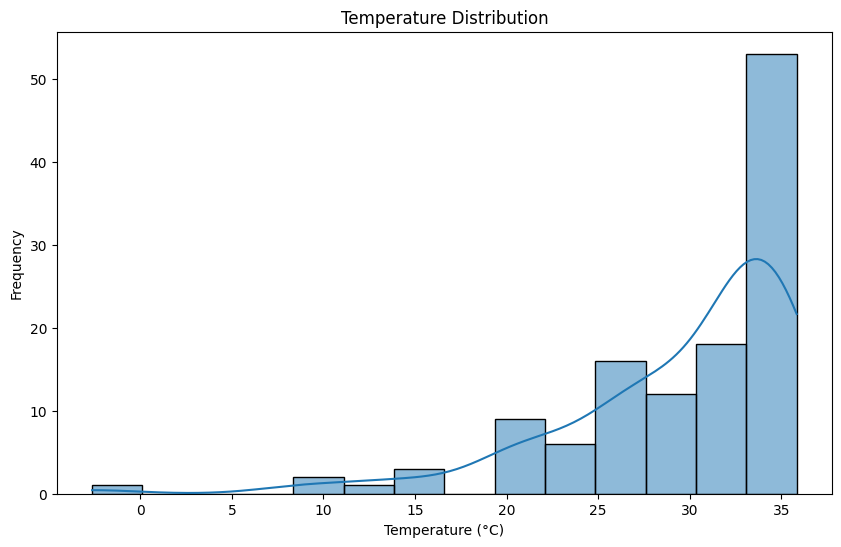

In [22]:
# Use histograms and boxplots to understand the distribution of variables like Temperature, Humidity, etc.

import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()



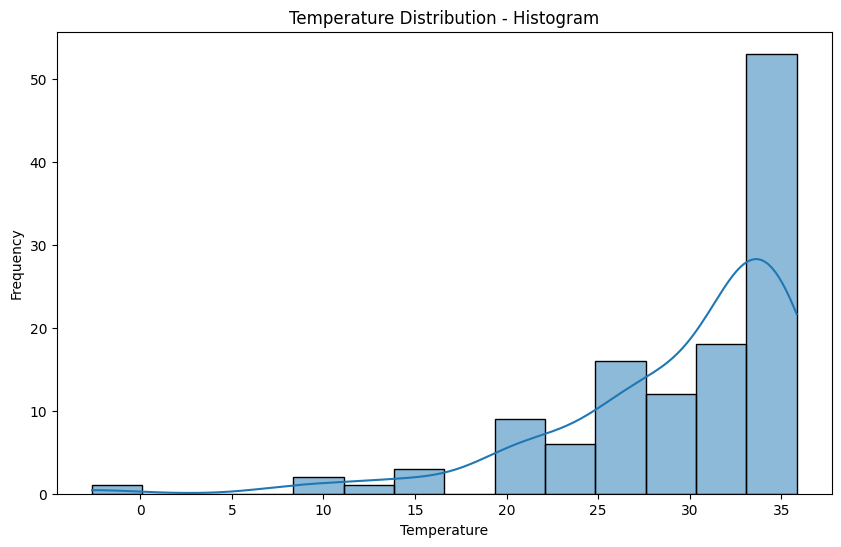

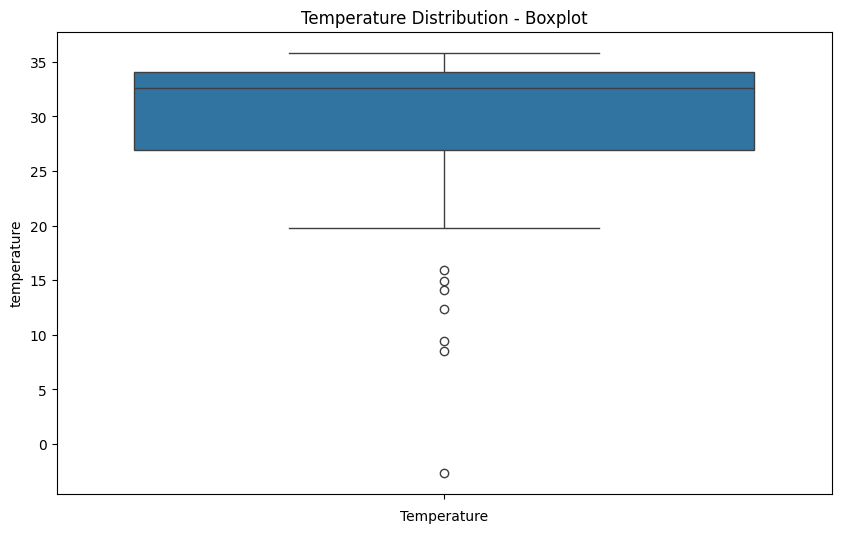

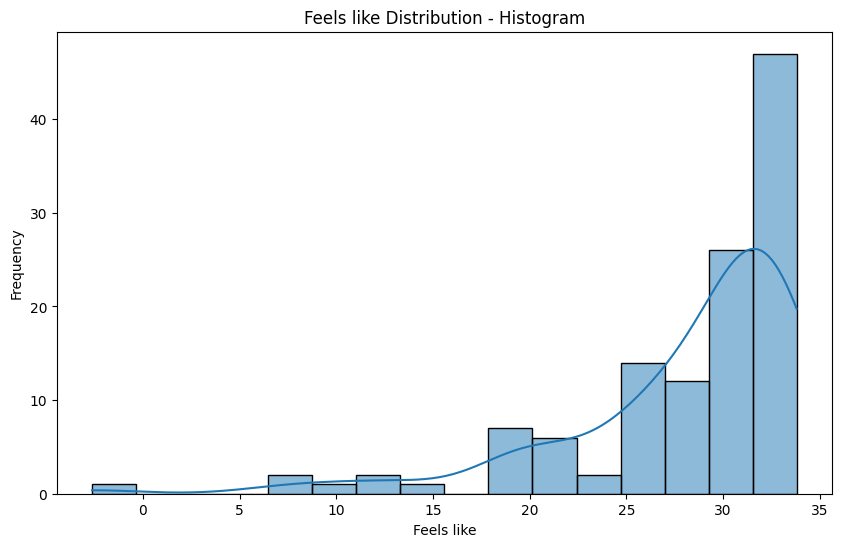

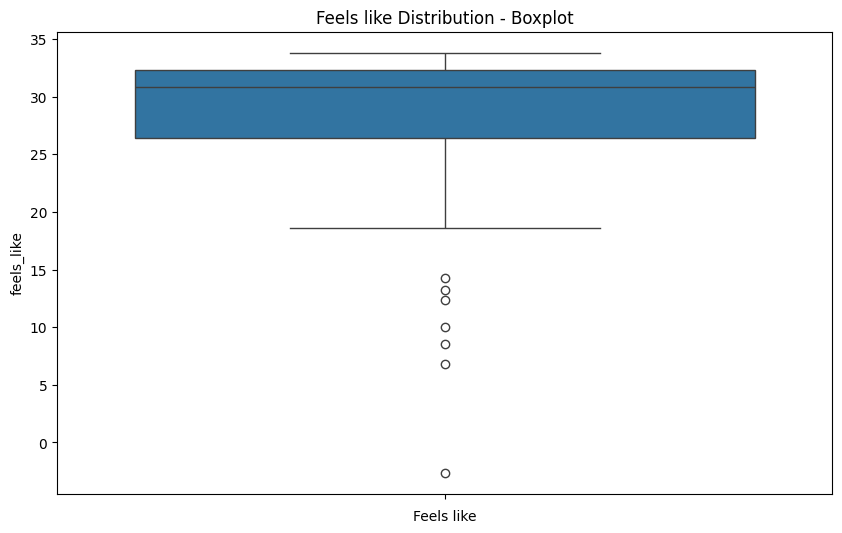

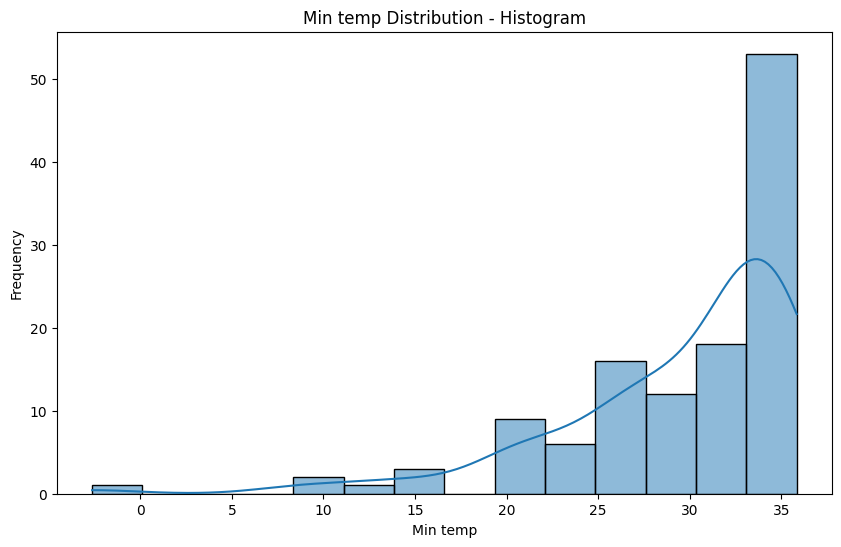

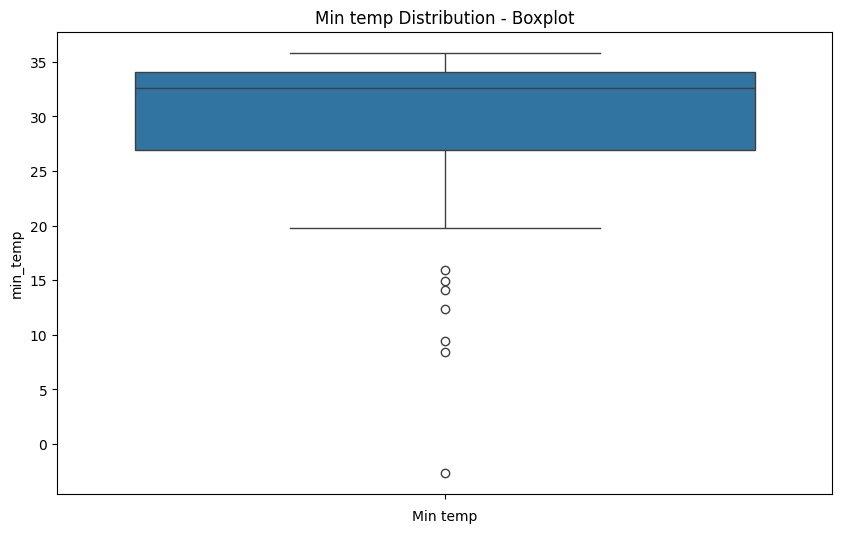

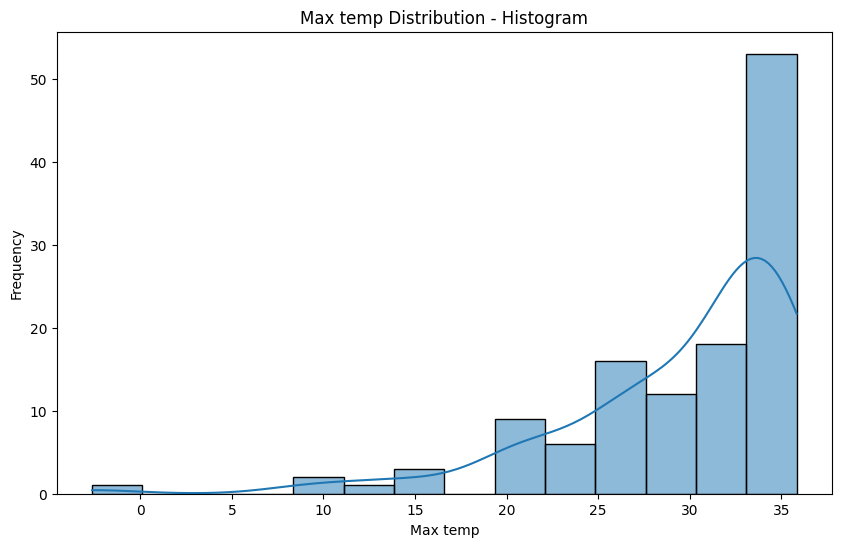

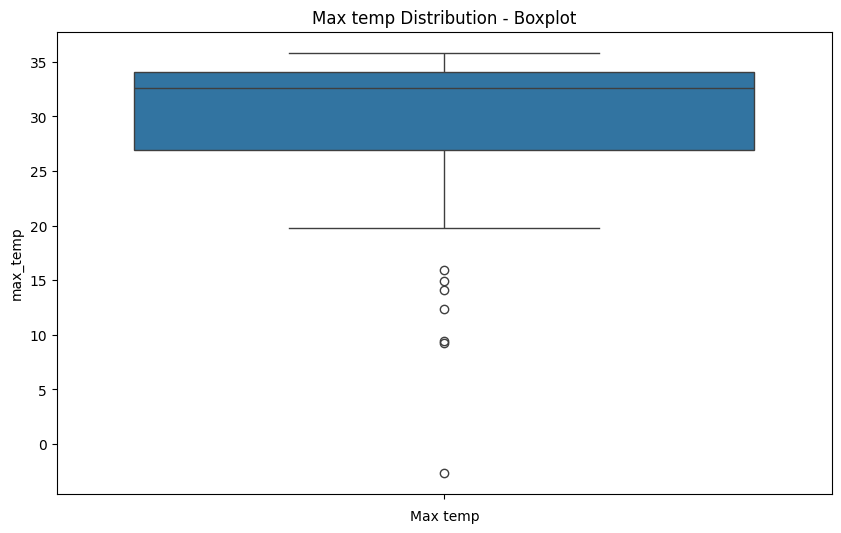

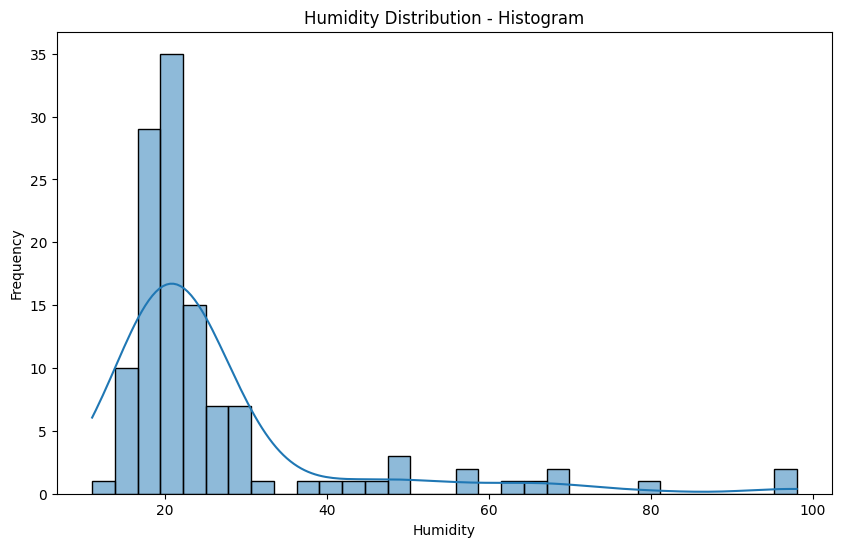

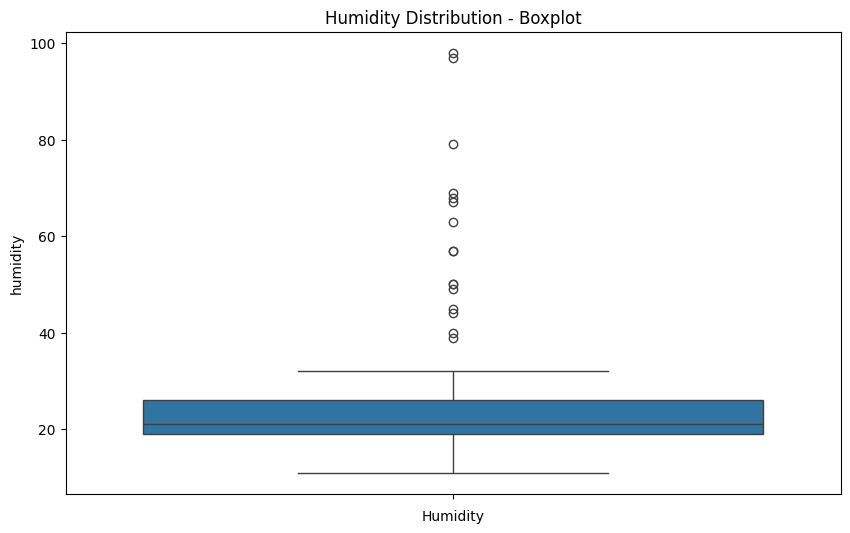

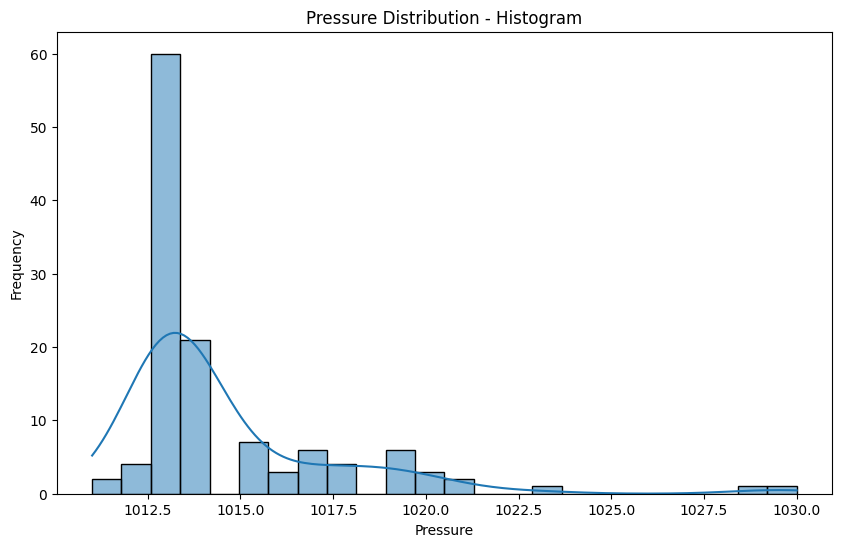

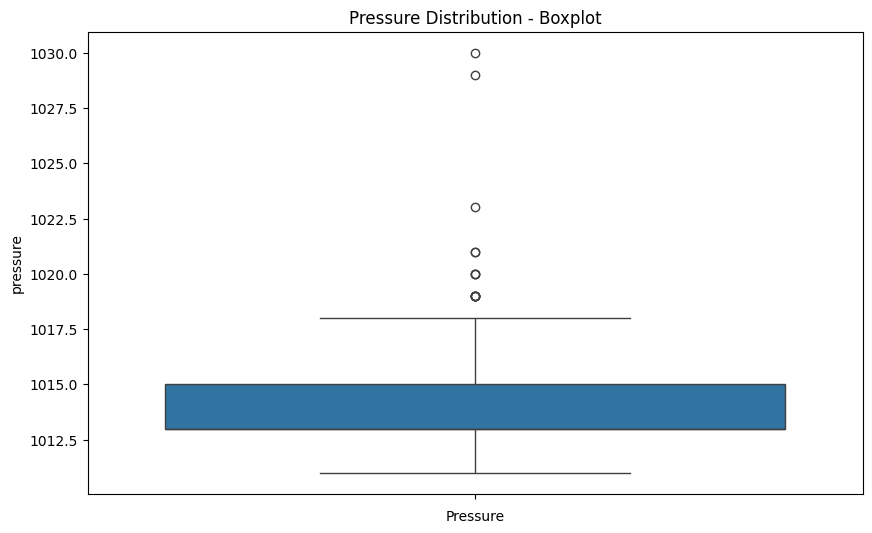

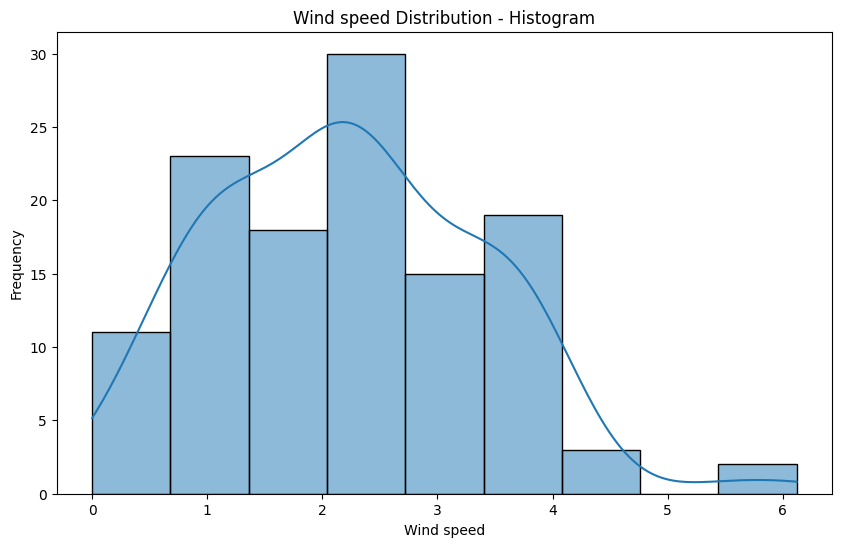

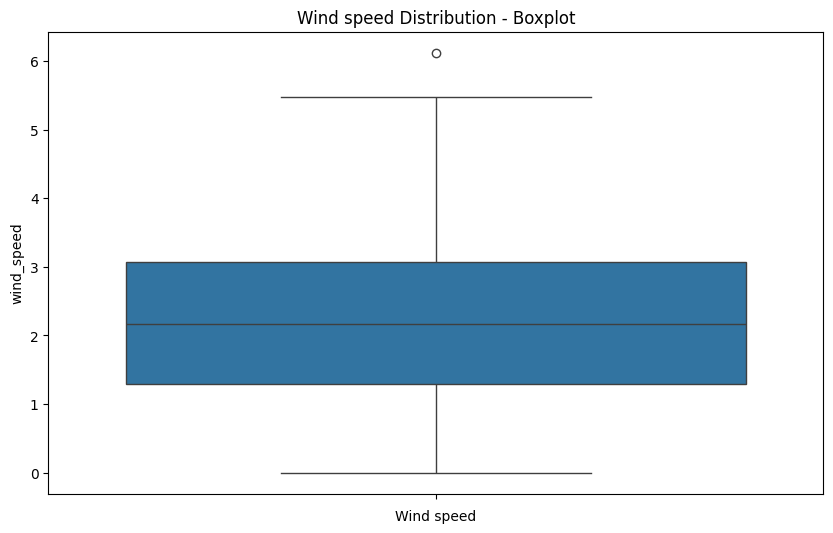

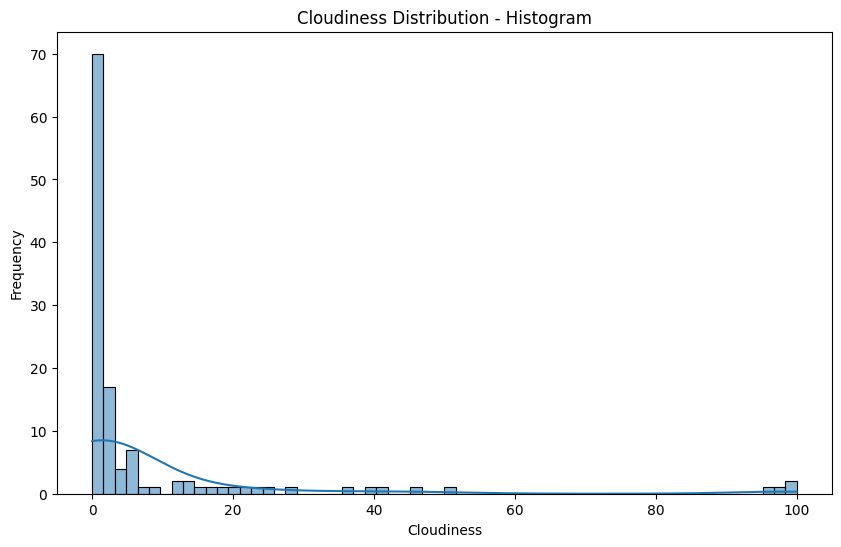

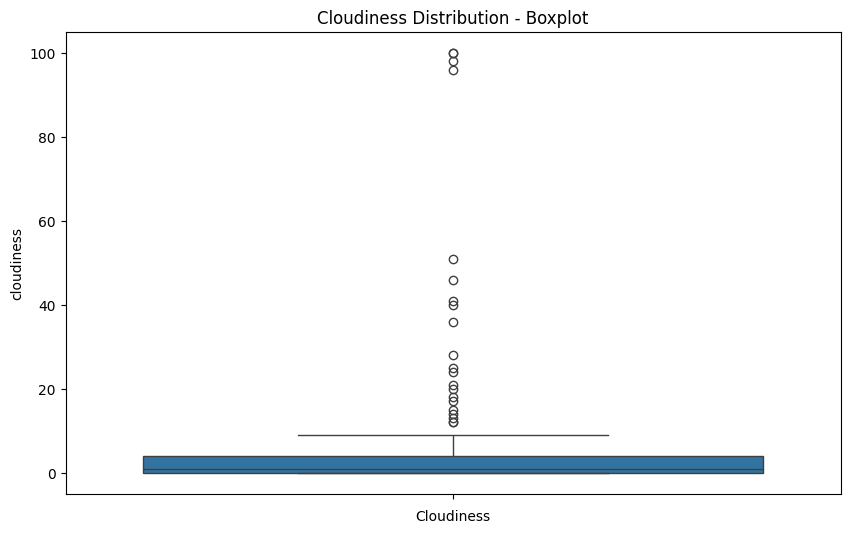

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = ['temperature', 'feels_like', 'min_temp', 'max_temp',
                   'humidity', 'pressure', 'wind_speed', 'cloudiness']

for col in columns_to_plot:
    # Histogram with KDE
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col.replace("_", " ").capitalize()} Distribution - Histogram')
    plt.xlabel(col.replace('_', ' ').capitalize())
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[col])
    plt.title(f'{col.replace("_", " ").capitalize()} Distribution - Boxplot')
    plt.xlabel(col.replace('_', ' ').capitalize())
    plt.show()


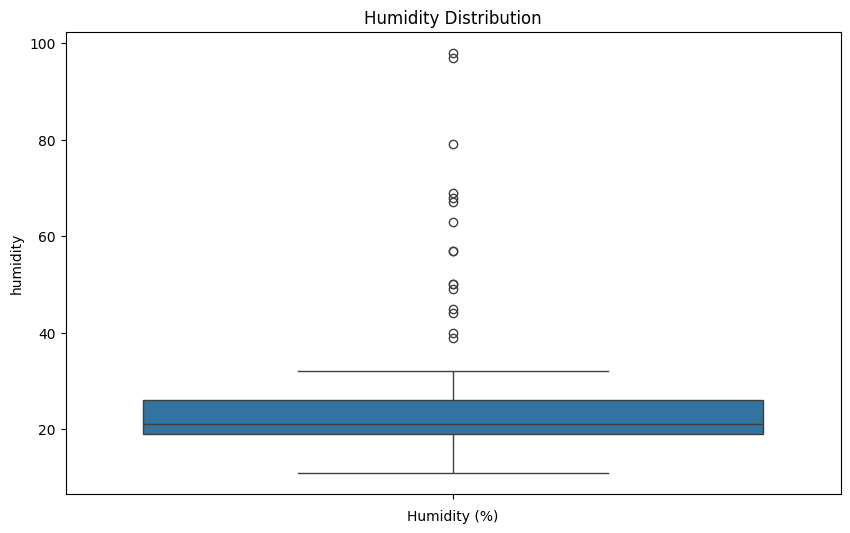

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['humidity'])
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.show()


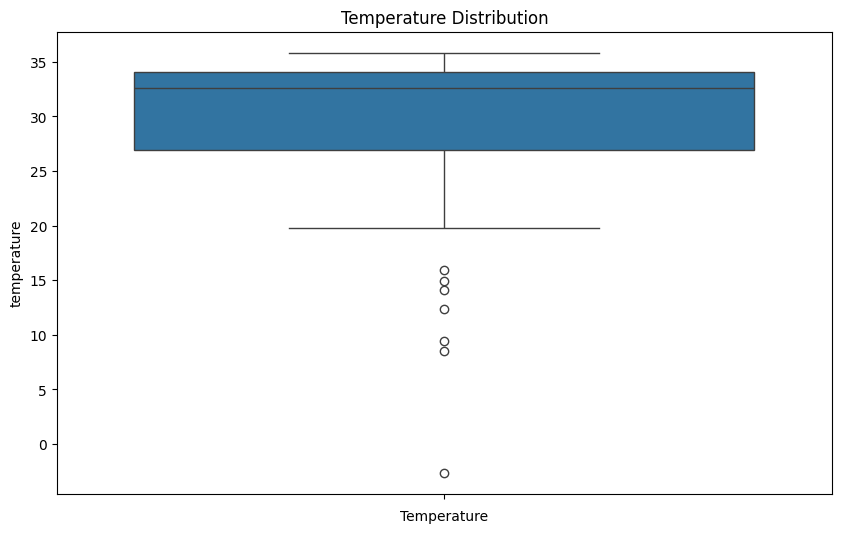

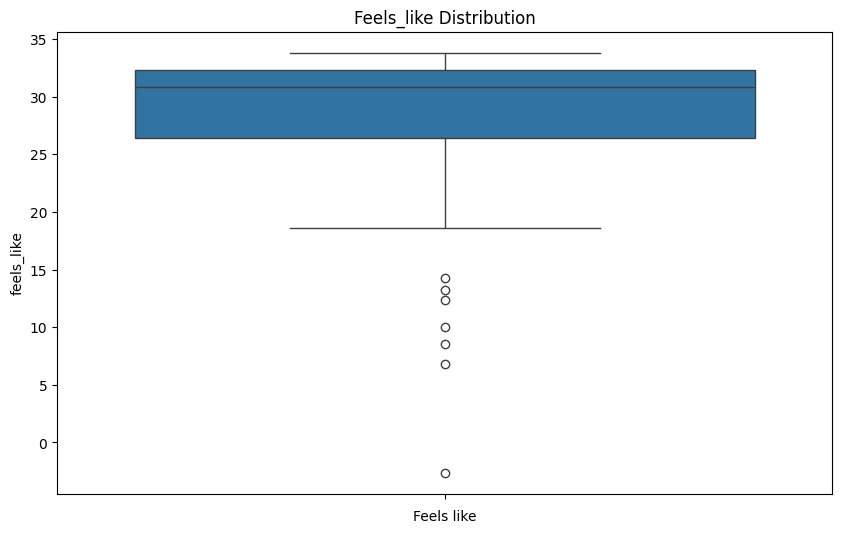

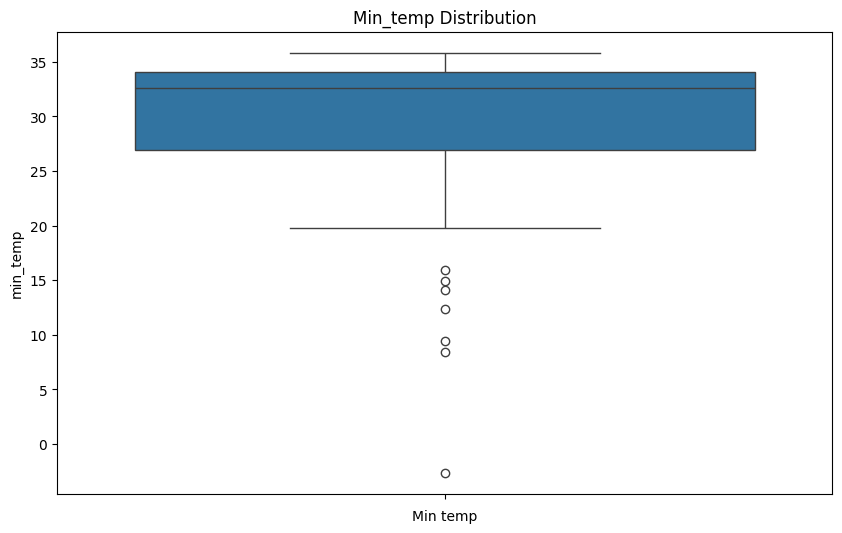

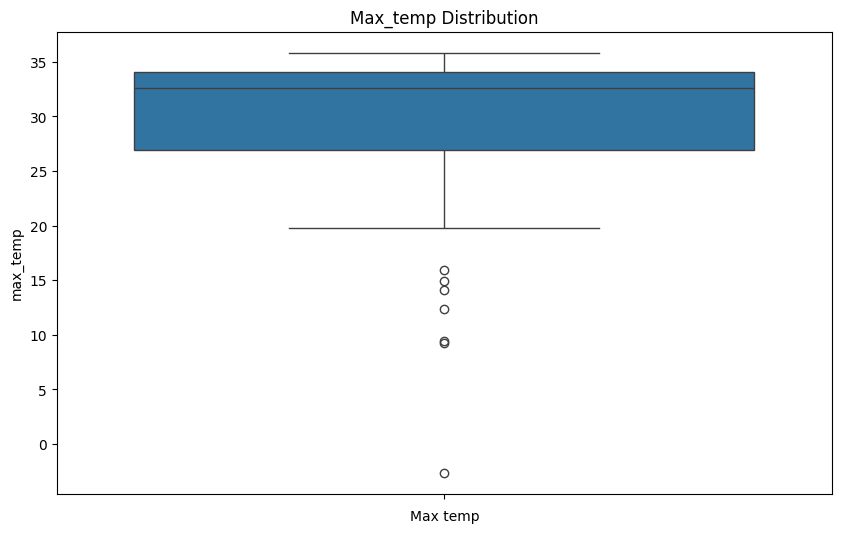

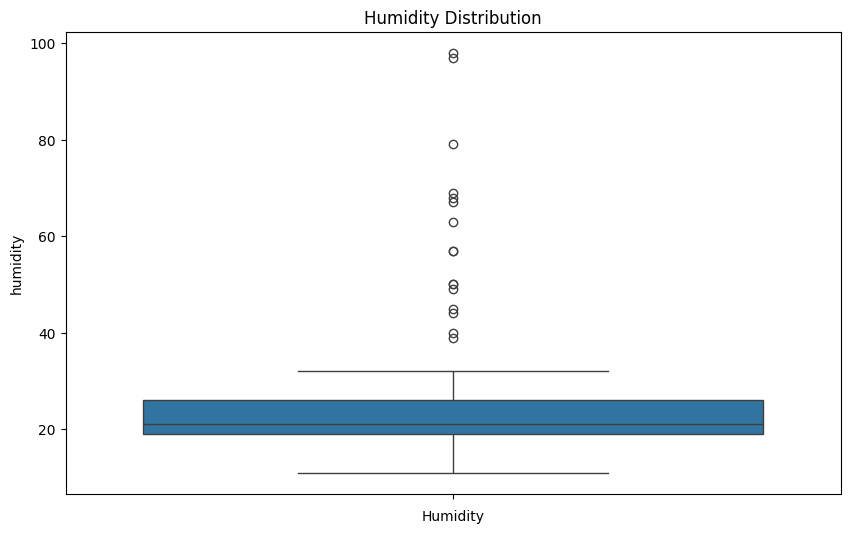

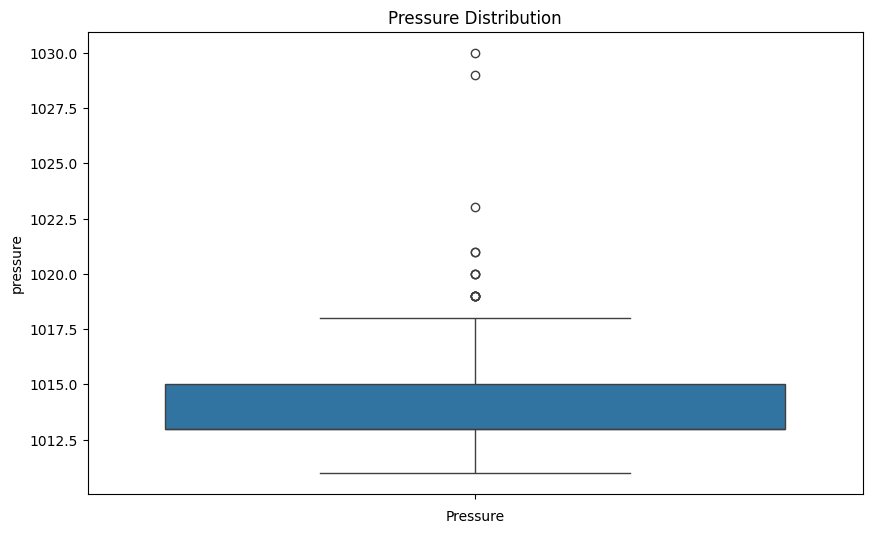

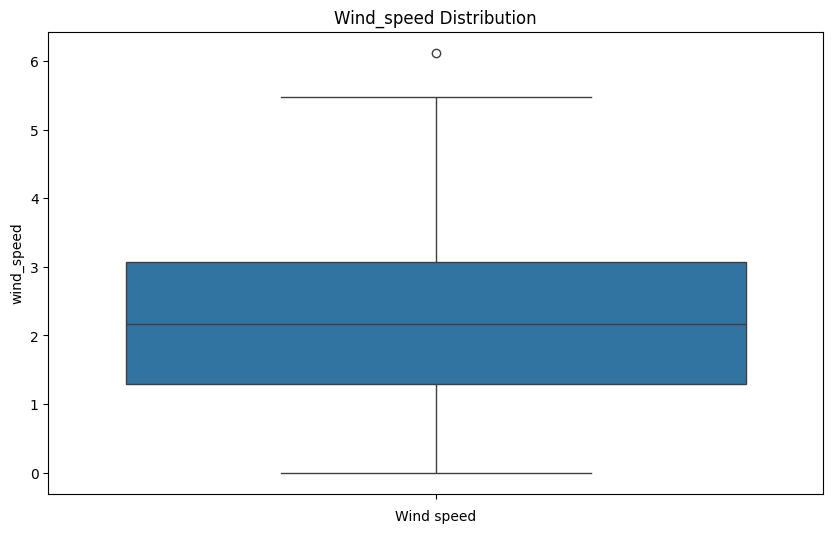

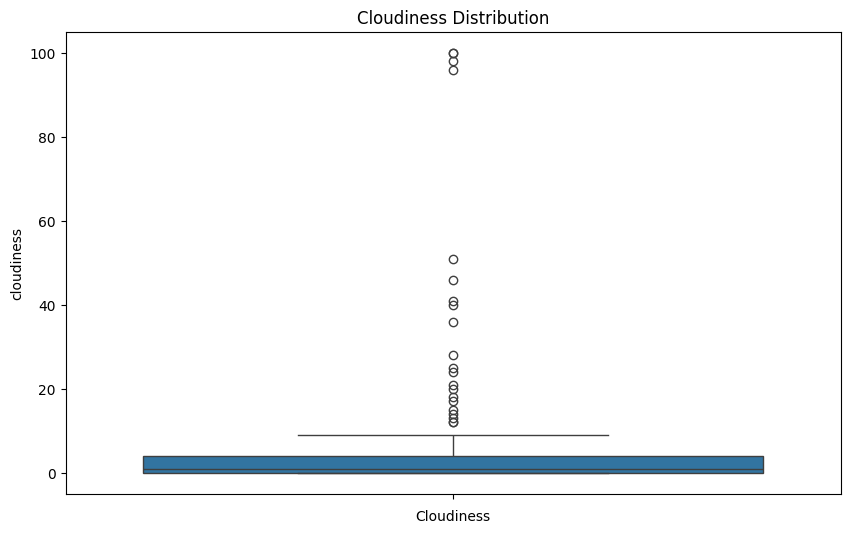

In [25]:
# the list of columns to plot
columns_to_plot = ['temperature', 'feels_like', 'min_temp', 'max_temp',
                   'humidity', 'pressure', 'wind_speed', 'cloudiness']

for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[col])
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.replace('_', ' ').capitalize())
    plt.show()


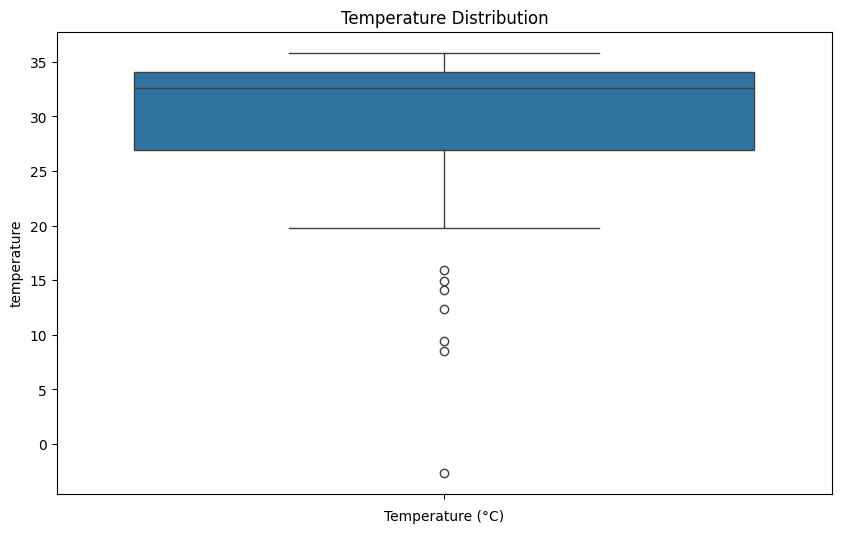

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['temperature'])
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.show()


In [27]:
city_province_group = df.groupby(['province', 'city']).agg({
    'temperature': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean',
    'cloudiness': 'mean'
}).reset_index()


print(city_province_group)

        province            city  temperature  humidity  wind_speed  \
0    Balochistan          Awaran        30.52      17.0        0.91   
1    Balochistan         Barkhan        25.51      25.0        2.86   
2    Balochistan            Bela        33.52      32.0        3.56   
3    Balochistan          Chaman        22.42      11.0        1.97   
4    Balochistan       Dalbandin        25.88      15.0        4.16   
..           ...             ...          ...       ...         ...   
116        Sindh          Sukkur        35.23      19.0        1.15   
117        Sindh      Tando Adam        35.79      19.0        3.59   
118        Sindh  Tando Allahyar        34.58      22.0        3.53   
119        Sindh          Thatta        33.36      28.0        2.62   
120        Sindh         Umerkot        28.01      63.0        2.55   

     cloudiness  
0           0.0  
1           0.0  
2           6.0  
3           2.0  
4           0.0  
..          ...  
116         0.0  
117

In [28]:

top_cities = city_province_group.sort_values(by='temperature', ascending=False).head(20)

print(top_cities)

        province            city  temperature  humidity  wind_speed  \
114        Sindh  Shahpur Chakar        35.84      18.0        2.64   
117        Sindh      Tando Adam        35.79      19.0        3.59   
115        Sindh       Shikarpur        35.61      18.0        1.06   
111        Sindh         Sanghar        35.54      20.0        2.87   
109        Sindh          Qambar        35.52      15.0        2.41   
93         Sindh            Hala        35.46      19.0        3.20   
103        Sindh         Larkana        35.40      15.0        1.21   
107        Sindh     Pir Jo Goth        35.30      18.0        0.57   
99         Sindh        Khairpur        35.25      19.0        0.43   
116        Sindh          Sukkur        35.23      19.0        1.15   
105        Sindh       Nawabshah        35.23      21.0        2.27   
95         Sindh       Jacobabad        35.17      18.0        1.38   
91         Sindh            Daur        35.10      22.0        1.30   
92    

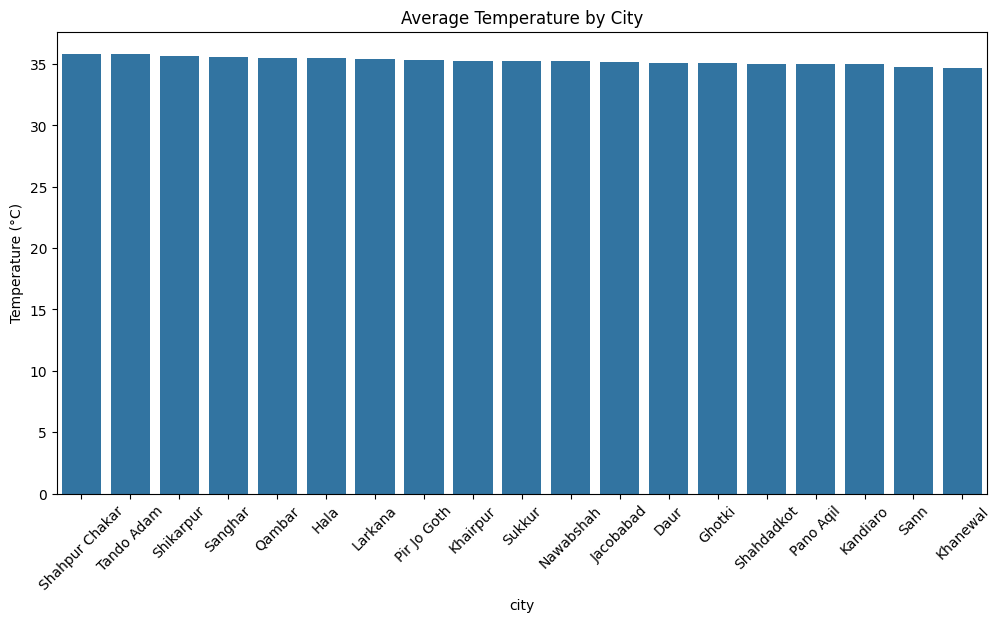

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='temperature', data=top_cities)
plt.title('Average Temperature by City')
plt.xticks(rotation=45)
plt.ylabel('Temperature (°C)')
plt.show()

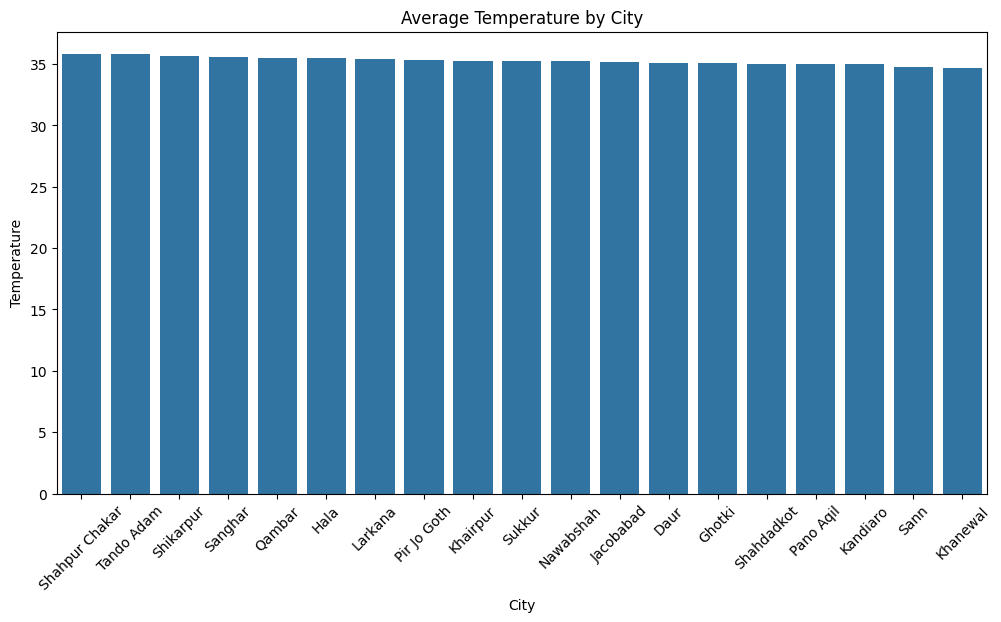

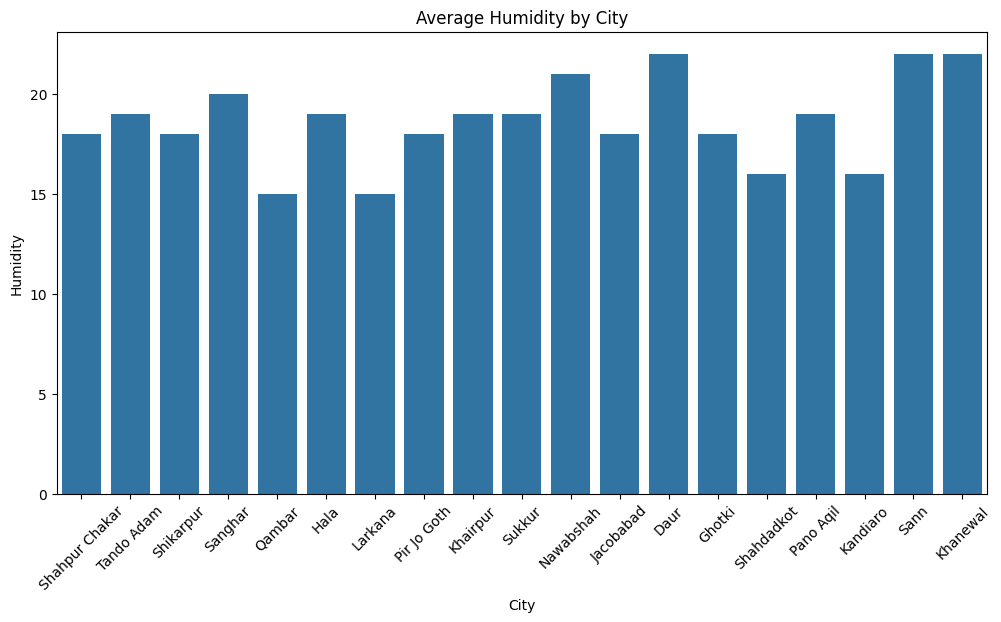

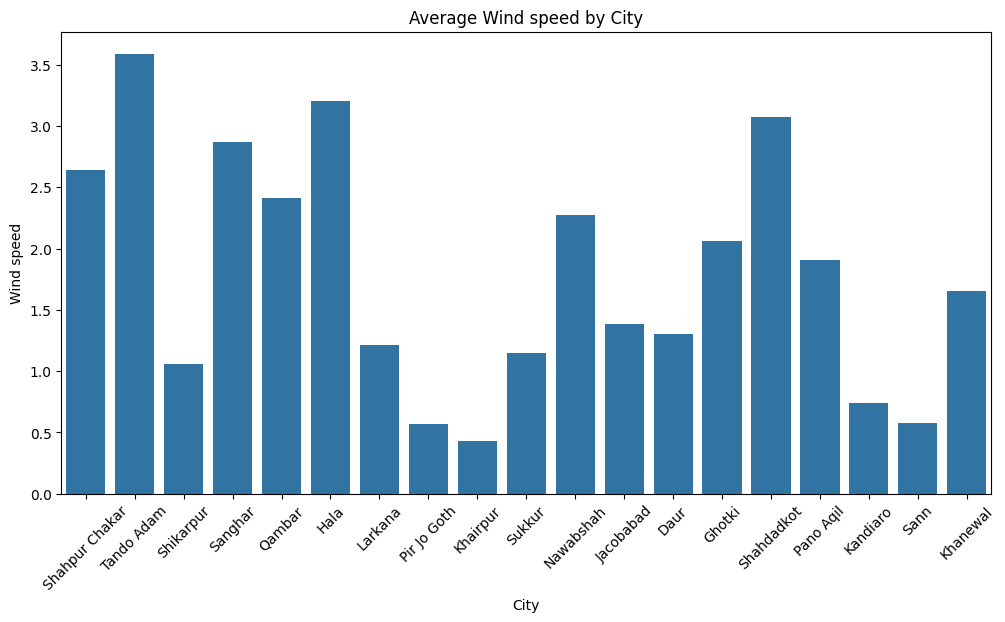

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = ['temperature',
                   'humidity', 'wind_speed']

for col in columns_to_plot:
    if col in top_cities.columns:
        plt.figure(figsize=(12, 6))
        sns.barplot(x='city', y=col, data=top_cities)
        plt.title(f'Average {col.replace("_", " ").capitalize()} by City')
        plt.xlabel('City')
        plt.ylabel(f'{col.replace("_", " ").capitalize()}')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Column '{col}' not found in 'top_cities' DataFrame.")


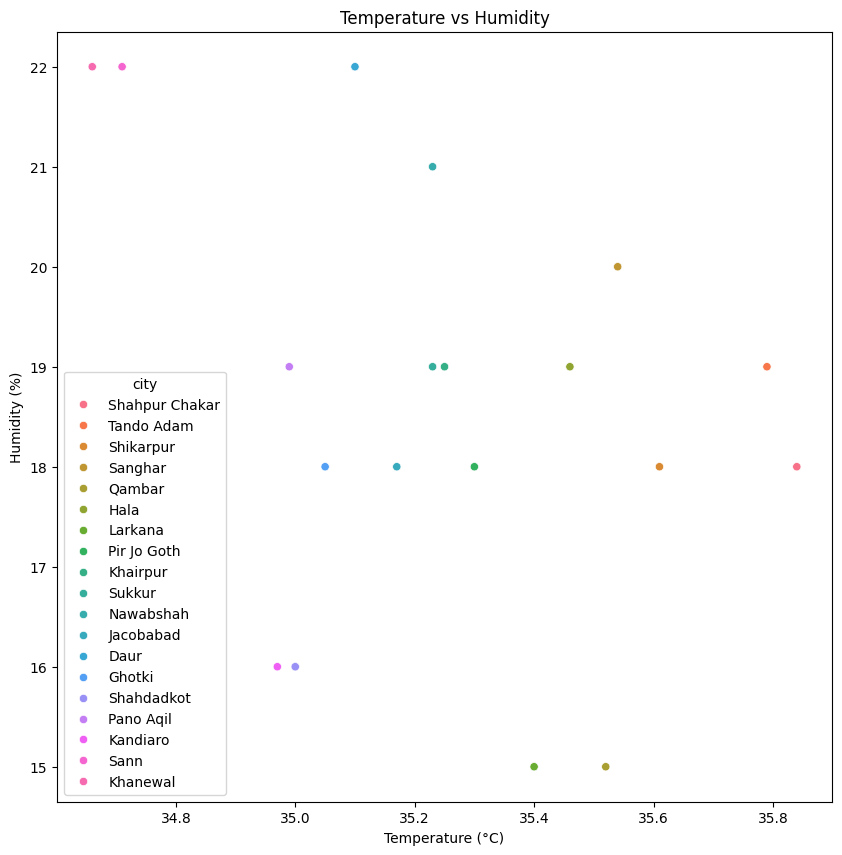

In [34]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='temperature', y='humidity', data=top_cities, hue='city')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()

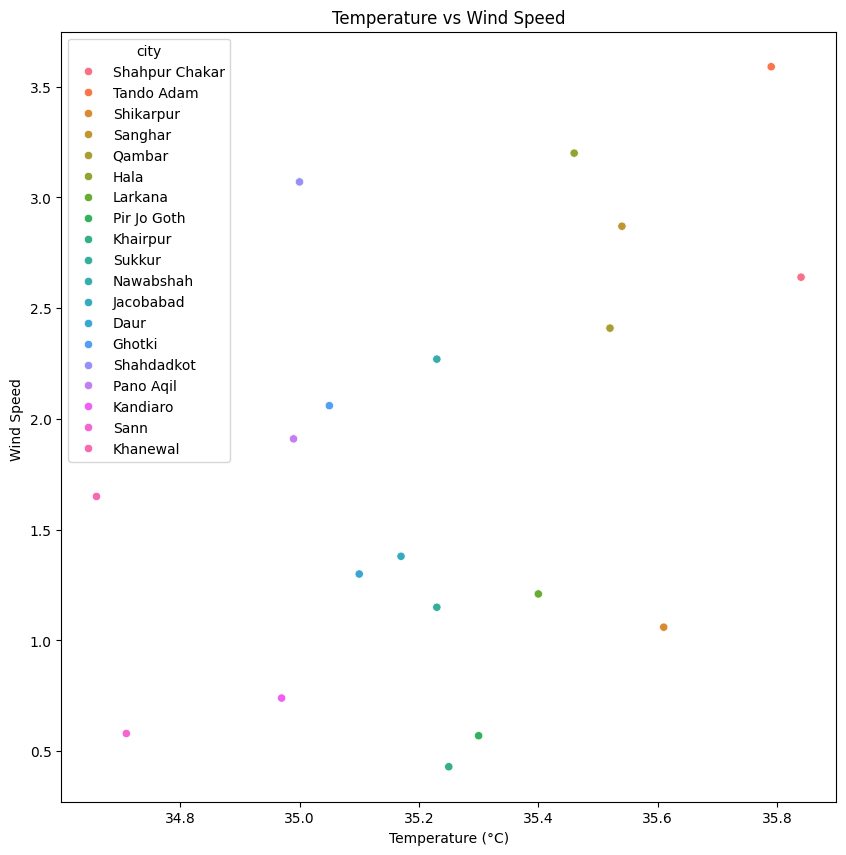

In [35]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='temperature', y='wind_speed', data=top_cities, hue='city')
plt.title('Temperature vs Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed ')
plt.show()

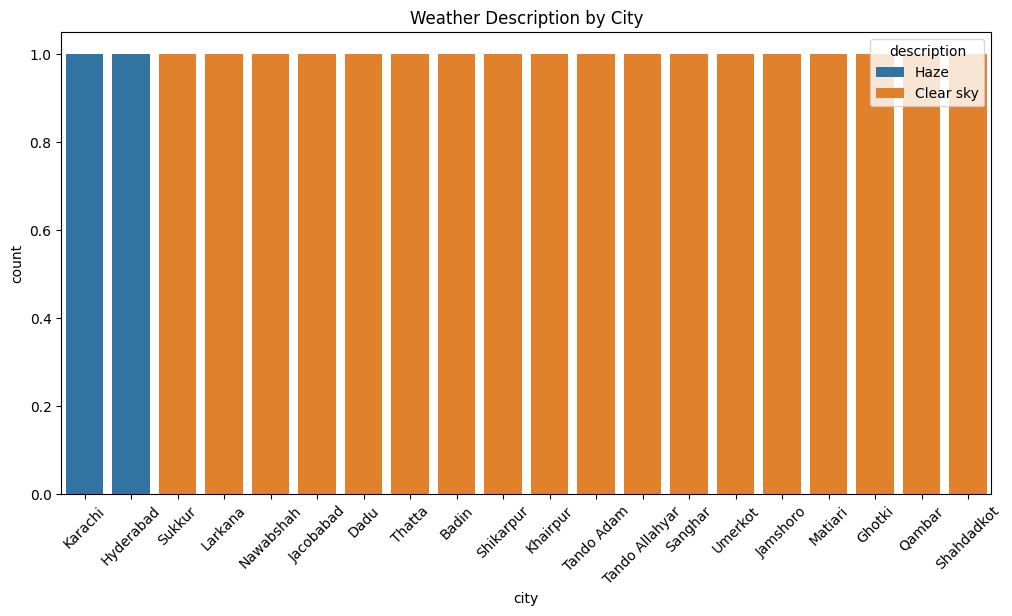

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x='city', hue='description', data=df.head(20))
plt.title('Weather Description by City')
plt.xticks(rotation=45)
plt.show()